In [23]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from os import path
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [25]:
DATA_DIR = 'C:\\Users\\Harry\\Documents\\LTCWFF\\ltcwff_files\\data'

pd.options.display.max_columns = None

team_data = pd.read_csv(path.join(DATA_DIR, 'team_data.csv'))

team_data

,Unnamed: 0,Team,Year,MP/G,FG/G,FGA/G,FG%/G,3P/G,3PA/G,3P%/G,2P/G,2PA/G,2P%/G,FT/G,FTA/G,FT%/G,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,LG MP/G,LG FG/G,LG FGA/G,LG FG%/G,LG 3P/G,LG 3PA/G,LG 3P%/G,LG 2P/G,LG 2PA/G,LG 2P%/G,LG FT/G,LG FTA/G,LG FT%/G,LG ORB/G,LG DRB/G,LG TRB/G,LG AST/G,LG STL/G,LG BLK/G,LG TOV/G,LG PF/G,LG PTS/G,OPP MP/G,OPP FG/G,OPP FGA/G,OPP FG%/G,OPP 3P/G,OPP 3PA/G,OPP 3P%/G,OPP 2P/G,OPP 2PA/G,OPP 2P%/G,OPP FT/G,OPP FTA/G,OPP FT%/G,OPP ORB/G,OPP DRB/G,OPP TRB/G,OPP AST/G,OPP STL/G,OPP BLK/G,OPP TOV/G,OPP PF/G,OPP PTS/G,LG OPP MP/G,LG OPP FG/G,LG OPP FGA/G,LG OPP FG%/G,LG OPP 3P/G,LG OPP 3PA/G,LG OPP 3P%/G,LG OPP 2P/G,LG OPP 2PA/G,LG OPP 2P%/G,LG OPP FT/G,LG OPP FTA/G,LG OPP FT%/G,LG OPP ORB/G,LG OPP DRB/G,LG OPP TRB/G,LG OPP AST/G,LG OPP STL/G,LG OPP BLK/G,LG OPP TOV/G,LG OPP PF/G,LG OPP PTS/G
0,0,ATL,2017,242.4,38.1,84.4,0.451,8.9,26.1,0.341,29.2,58.3,0.501,18.1,24.9,0.728,10.3,34.1,44.3,23.6,8.2,4.8,15.8,18.2,103.2,4,23,22,18.0,20,16,23.0,18,17,14.0,13,5,28.0,14,10,9,10,7,14,28,6,22,242.4,38.8,87.3,0.444,10.9,30.5,0.357,27.9,56.7,0.491,15.6,20.2,0.772,10.7,33.2,43.9,23.4,9.0,5.2,15.4,21.6,104.0,4,13,23,5.0,28,29,16.0,6,9,6.0,4,4,16.0,22,15,16,19,29,22,2,3,10
1,1,BOS,2017,240.9,38.6,85.1,0.454,12.0,33.4,0.359,26.6,51.7,0.515,18.7,23.2,0.807,9.1,32.9,42.0,25.2,7.5,4.1,13.3,20.6,108.0,25,21,18,16.0,3,3,14.0,28,28,8.0,10,15,3.0,22,22,27,4,18,23,8,21,7,240.9,38.6,85.8,0.450,9.0,27.0,0.332,29.7,58.8,0.505,19.1,24.9,0.769,10.8,33.8,44.5,22.6,7.6,5.2,13.9,20.3,105.4,25,12,15,9.0,7,14,2.0,14,13,19.0,25,25,9.0,25,20,25,12,17,23,17,11,15
2,2,BRK,2017,240.9,37.8,85.2,0.444,10.7,31.6,0.338,27.1,53.6,0.506,19.4,24.6,0.788,8.8,35.1,43.9,21.4,7.2,4.7,16.5,21.0,105.8,25,25,17,24.0,6,4,26.0,25,25,11.0,4,7,9.0,26,1,10,20,21,18,29,25,12,240.9,41.6,90.8,0.458,10.0,27.2,0.366,31.7,63.6,0.498,19.3,25.0,0.772,11.0,36.2,47.2,23.0,9.5,5.6,13.3,20.4,112.5,25,29,30,18.0,20,17,21.0,29,30,10.0,26,26,15.0,27,29,29,16,30,30,21,9,29
3,3,CHO,2017,241.8,37.7,85.4,0.442,10.0,28.6,0.351,27.7,56.7,0.488,19.4,23.8,0.815,8.8,34.8,43.6,23.1,7.0,4.8,11.5,16.6,104.9,10,26,15,26.0,11,9,18.0,22,21,27.0,5,10,1.0,26,4,16,11,27,17,1,1,16,241.8,39.5,86.5,0.456,11.6,31.4,0.369,27.9,55.1,0.506,14.2,18.2,0.776,8.9,35.5,44.4,24.5,6.6,5.5,13.1,19.9,104.7,10,18,21,15.0,30,30,25.0,7,5,21.0,1,1,21.0,3,26,22,28,2,28,23,15,13
4,4,CHI,2017,241.2,38.6,87.1,0.444,7.6,22.3,0.340,31.0,64.8,0.479,18.0,22.5,0.798,12.2,34.1,46.3,22.6,7.8,4.8,13.6,17.7,102.9,18,20,8,25.0,28,29,24.0,6,3,29.0,15,19,6.0,2,9,3,14,15,16,12,2,23,241.2,39.5,86.6,0.456,8.9,25.9,0.345,30.5,60.7,0.503,14.6,19.0,0.770,10.3,32.9,43.2,23.6,7.3,4.6,13.4,18.8,102.4,18,17,22,14.0,6,9,6.0,24,24,16.0,2,2,11.0,17,12,13,23,10,12,20,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,SAC,2021,242.5,40.6,88.7,0.458,10.8,30.7,0.352,29.8,58.0,0.514,20.4,28.5,0.716,10.8,33.4,44.2,24.2,6.5,5.3,13.8,20.8,112.4,8,14,15,14.0,26,27,20.0,9,7,17.0,2,1,26.0,9,24,17,17,26,10,8,17,14,242.5,45.6,91.9,0.496,14.4,37.6,0.383,31.2,54.3,0.575,15.4,19.0,0.811,8.5,36.2,44.7,27.9,7.2,5.8,13.5,21.8,121.0,8,30,29,30.0,26,25,24.0,28,19,29.0,9,5,28.0,2,19,15,29,11,25,25,7,28
146,146,SAS,2021,242.5,42.0,94.4,0.445,12.1,30.9,0.392,29.9,63.5,0.471,15.0,19.4,0.773,9.3,36.1,45.4,25.5,6.6,5.1,10.8,17.8,111.1,8,8,1,23.0,21,26,4.0,7,1,30.0,26,28,12.0,18,11,11,10,25,14,1,4,17,242.5,43.3,90.6,0.478,12.8,31.3,0.409,30.5,59.3,0.514,13.7,19.1,0.717,9.6,40.8,50.4,25.3,5.6,6.3,13.8,19.4,113.1,8,27,22,25.0,15,4,30.0,27,28,13.0,3,7,4.0,17,30,30,20,1,29,23,23,23
147,147,TOR,2021,240.0,39.2,89.4,0.439,15.2,42.3,0.360,24.0,47.1,0.509,17.4,22.6,0.773,9.9,33.7,43.6,23.2,8.7,6.1,14.2,23.4,111.1,26,22,10,28.0,3,1,18.0,30,25,20.

In [6]:
num_vars = ['FG%/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'PTS/G', 'OPP FG%/G', 'OPP TRB/G', 'OPP AST/G', 'OPP STL/G', 'OPP BLK/G', 'OPP PTS/G']
team_data_filtered = team_data[num_vars]

In [7]:
teams = [ f'{team}_{year}' for (team, year) in zip(team_data['Team'], team_data['Year']) ]
teams

['ATL_2017',
 'BOS_2017',
 'BRK_2017',
 'CHO_2017',
 'CHI_2017',
 'CLE_2017',
 'DAL_2017',
 'DEN_2017',
 'DET_2017',
 'GSW_2017',
 'HOU_2017',
 'IND_2017',
 'LAC_2017',
 'LAL_2017',
 'MEM_2017',
 'MIA_2017',
 'MIL_2017',
 'MIN_2017',
 'NOP_2017',
 'NYK_2017',
 'OKC_2017',
 'ORL_2017',
 'PHI_2017',
 'PHO_2017',
 'POR_2017',
 'SAC_2017',
 'SAS_2017',
 'TOR_2017',
 'UTA_2017',
 'WAS_2017',
 'ATL_2018',
 'BOS_2018',
 'BRK_2018',
 'CHO_2018',
 'CHI_2018',
 'CLE_2018',
 'DAL_2018',
 'DEN_2018',
 'DET_2018',
 'GSW_2018',
 'HOU_2018',
 'IND_2018',
 'LAC_2018',
 'LAL_2018',
 'MEM_2018',
 'MIA_2018',
 'MIL_2018',
 'MIN_2018',
 'NOP_2018',
 'NYK_2018',
 'OKC_2018',
 'ORL_2018',
 'PHI_2018',
 'PHO_2018',
 'POR_2018',
 'SAC_2018',
 'SAS_2018',
 'TOR_2018',
 'UTA_2018',
 'WAS_2018',
 'ATL_2019',
 'BOS_2019',
 'BRK_2019',
 'CHO_2019',
 'CHI_2019',
 'CLE_2019',
 'DAL_2019',
 'DEN_2019',
 'DET_2019',
 'GSW_2019',
 'HOU_2019',
 'IND_2019',
 'LAC_2019',
 'LAL_2019',
 'MEM_2019',
 'MIA_2019',
 'MIL_2019',

In [8]:
team_data_filtered.insert(0, 'Team', teams)
team_data_filtered.set_index('Team', inplace = True)
team_data_filtered

,FG%/G,TRB/G,AST/G,STL/G,BLK/G,PTS/G,OPP FG%/G,OPP TRB/G,OPP AST/G,OPP STL/G,OPP BLK/G,OPP PTS/G
Team,,,,,,,,,,,,
ATL_2017,0.451,44.3,23.6,8.2,4.8,103.2,0.444,43.9,23.4,9.0,5.2,104.0
BOS_2017,0.454,42.0,25.2,7.5,4.1,108.0,0.450,44.5,22.6,7.6,5.2,105.4
BRK_2017,0.444,43.9,21.4,7.2,4.7,105.8,0.458,47.2,23.0,9.5,5.6,112.5
CHO_2017,0.442,43.6,23.1,7.0,4.8,104.9,0.456,44.4,24.5,6.6,5.5,104.7
CHI_2017,0.444,46.3,22.6,7.8,4.8,102.9,0.456,43.2,23.6,7.3,4.6,102.4
...,...,...,...,...,...,...,...,...,...,...,...,...
SAC_2021,0.458,44.2,24.2,6.5,5.3,112.4,0.496,44.7,27.9,7.2,5.8,121.0
SAS_2021,0.445,45.4,25.5,6.6,5.1,111.1,0.478,50.4,25.3,5.6,6.3,113.1
TOR_2021,0.439,43.6,23.2,8.7,6.1,111.1,0.455,47.1,27.7,6.3,6.7,112.6


In [9]:
team_data_scaled = normalize(team_data_filtered)
team_data_scaled = pd.DataFrame(team_data_scaled, columns = team_data_filtered.columns)
team_data_scaled.insert(0, 'Team', teams)
team_data_scaled.set_index('Team', inplace = True)
team_data_scaled

,FG%/G,TRB/G,AST/G,STL/G,BLK/G,PTS/G,OPP FG%/G,OPP TRB/G,OPP AST/G,OPP STL/G,OPP BLK/G,OPP PTS/G
Team,,,,,,,,,,,,
ATL_2017,0.002762,0.271319,0.144540,0.050222,0.029398,0.632057,0.002719,0.268869,0.143315,0.055121,0.031848,0.636957
BOS_2017,0.002722,0.251802,0.151081,0.044965,0.024581,0.647491,0.002698,0.266790,0.135493,0.045564,0.031175,0.631903
BRK_2017,0.002599,0.256959,0.125260,0.042144,0.027510,0.619277,0.002681,0.276275,0.134625,0.055606,0.032778,0.658494
CHO_2017,0.002684,0.264761,0.140275,0.042507,0.029148,0.637004,0.002769,0.269619,0.148776,0.040078,0.033399,0.635790
CHI_2017,0.002737,0.285441,0.139330,0.048087,0.029592,0.634381,0.002811,0.266329,0.145495,0.045005,0.028359,0.631299
...,...,...,...,...,...,...,...,...,...,...,...,...
SAC_2021,0.002531,0.244252,0.133731,0.035919,0.029288,0.621129,0.002741,0.247015,0.154177,0.039788,0.032051,0.668653
SAS_2021,0.002521,0.257161,0.144441,0.037385,0.028888,0.629307,0.002708,0.285482,0.143308,0.031720,0.035685,0.640636
TOR_2021,0.002508,0.249063,0.132529,0.049698,0.034846,0.634653,0.002599,0.269056,0.158235,0.035988,0.038273,0.643221


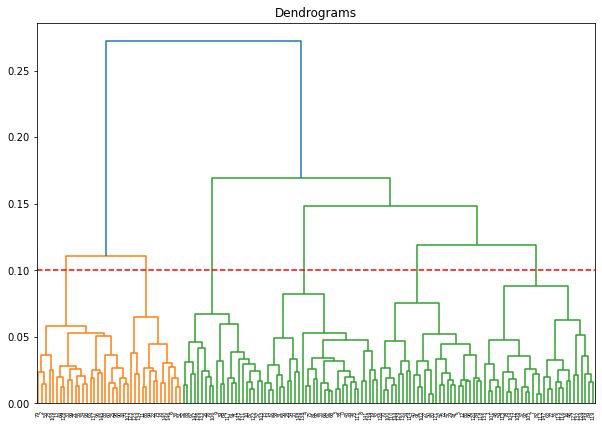

In [10]:
plt.figure(figsize = (10, 7))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(team_data_scaled, method = 'ward'))
plt.axhline(y = 0.10, color = 'r', linestyle = '--')

In [12]:
cluster = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
team_clusters = cluster.fit_predict(team_data_scaled)

In [13]:
groups = []

team_data_filtered['Cluster'] = np.nan

for i in range(6):
    group = []
    for j in range(len(team_clusters)):
        if team_clusters[j] == i:
            group.append(team_data_filtered.iloc[j].name)
            team_data_filtered['Cluster'].iloc[j] = i
    groups.append(group)
    
cluster_stats = []

for i in range(6):
    cluster_stats.append(team_data_filtered.loc[team_data_filtered['Cluster'] == i].mean().to_frame().transpose())
    
cluster_stats = pd.concat(cluster_stats)
cluster_stats.set_index('Cluster')
    
groups = pd.DataFrame(groups)
groups

<ipython-input-13-a001da962d2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['Cluster'] = np.nan
<ipython-input-13-a001da962d2e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_filtered['Cluster'].iloc[j] = i


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,BOS_2017,DEN_2017,MIL_2017,MIN_2017,CLE_2018,DEN_2018,MIL_2018,NOP_2018,WAS_2018,CHO_2019,...,SAC_2020,SAS_2020,WAS_2020,CHI_2021,DEN_2021,LAC_2021,MIA_2021,TOR_2021,WAS_2021,None
1,ATL_2017,CHO_2017,CHI_2017,DET_2017,MEM_2017,MIA_2017,NYK_2017,OKC_2017,UTA_2017,BOS_2018,...,DET_2019,LAL_2019,MIA_2019,ORL_2019,BRK_2020,ORL_2020,NOP_2021,NYK_2021,ORL_2021,UTA_2021
2,GSW_2017,HOU_2017,SAS_2017,GSW_2018,PHI_2018,TOR_2018,BOS_2019,DEN_2019,GSW_2019,IND_2019,...,PHO_2021,None,None,None,None,None,None,None,None,None
3,DAL_2017,IND_2017,NOP_2017,PHI_2017,DAL_2018,ORL_2018,MEM_2019,SAC_2019,CHI_2020,CHO_2021,...,None,None,None,None,None,None,None,None,None,None
4,CLE_2017,LAC_2017,POR_2017,TOR_2017,WAS_2017,HOU_2018,IND_2018,LAC_2018,MIN_2018,OKC_2018,...,UTA_2020,ATL_2021,BOS_2021,DAL_2021,GSW_2021,HOU_2021,POR_2021,None,None,None
5,BRK_2017,LAL_2017,ORL_2017,PHO_2017,SAC_2017,ATL_2018,CHI_2018,MEM_2018,PHO_2018,SAC_2018,...,NYK_2020,DET_2021,MIN_2021,SAC_2021,None,None,None,None,None,None
